In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn import linear_model

### **Plot Function** 

In [2]:
def plot_res(data_x, data_y, weights=None, is_list=False, labels=None, 
             is_data_list=False, data_labels=None, func=None):

    if is_data_list:
        minmax = [[np.concatenate(data_x).min(),np.concatenate(data_x).max()],[np.concatenate(data_y).min(),np.concatenate(data_y).max()]]
    else:
        minmax = [[data_x.min(),data_x.max()],[data_y.min(),data_y.max()]]

    xval = np.arange(minmax[0][0],minmax[0][1],0.001)

    markers = ["o","v","s","D","X"]
    fig = plt.figure(figsize=(12,6),dpi=200)
    ax = plt.subplot(111)

    if data_labels is None:
        data_labels = []
        if is_data_list:
            for i in range(1,len(weights)+1):
                data_labels.append('data '+str(i))
        else:
            data_labels = ['data']

    if is_data_list:
        for i in range(len(data_x)):
            ax.plot(data_x[i],data_y[i], label=data_labels[i], lw=0, marker=markers[0], markersize=5)
    else:
        ax.plot(data_x,data_y, label=data_labels[0], lw=0, marker=markers[0], markersize=5)

    if labels is None:
        labels = []
        if is_list:
            for i in range(1,len(weights)+1):
                labels.append(str(i))
        else:
            labels = [str(1)]

    if func is None:
        if is_list:
            func = []
            for i in range(1,len(weights)+1):
                func.append(lambda x: x)
        else:
            func = lambda x: x

            
    if weights is not None:
        if is_list:
            i = 0
            for iweights in weights:
                ax.plot(xval, [iweights[1]*func[i](x)+iweights[0] for x in xval],
                        label=labels[i], lw=3)
                i += 1
        else:
            ax.plot(xval, [weights[1]*func(x)+weights[0] for x in xval],
                    label=labels[0], lw=3)

    ax.legend(loc='upper left', fancybox=True, fontsize=20)
    plt.xlabel('X', fontsize=20)
    plt.ylabel('Y', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.grid(True)

    plt.ylim(1.02*minmax[1][0]-0.02*minmax[1][1],1.02*minmax[1][1]-0.02*minmax[1][0])        
    plt.xlim(1.02*minmax[0][0]-0.02*minmax[0][1],1.02*minmax[0][1]-0.02*minmax[0][0])      

## **Aufgabenstellung**
- 

### Import Data as Dataframe
- Ich würde an dieser Stelle mit einem Dataframe arbeiten

In [3]:
url = "/Users/msyl16/Desktop/Project 230/reg.csv"
data = pd.read_csv(url)
df = pd.DataFrame(data = data)
df = df.drop('Unnamed: 0', axis=1)
df

,data_x,data_y
0,2.235205,242.925073
1,0.097037,79.942875
2,0.967102,283.270005
3,0.786773,121.106831
4,2.572920,166.247102
...,...,...
4995,2.128779,134.458883
4996,1.111380,45.441895
4997,1.838361,86.014665
4998,3.472685,-121.228945


### Seperating Data into x & y

In [4]:
data_x = np.array(df.data_x)
data_y = np.array(df.data_y)


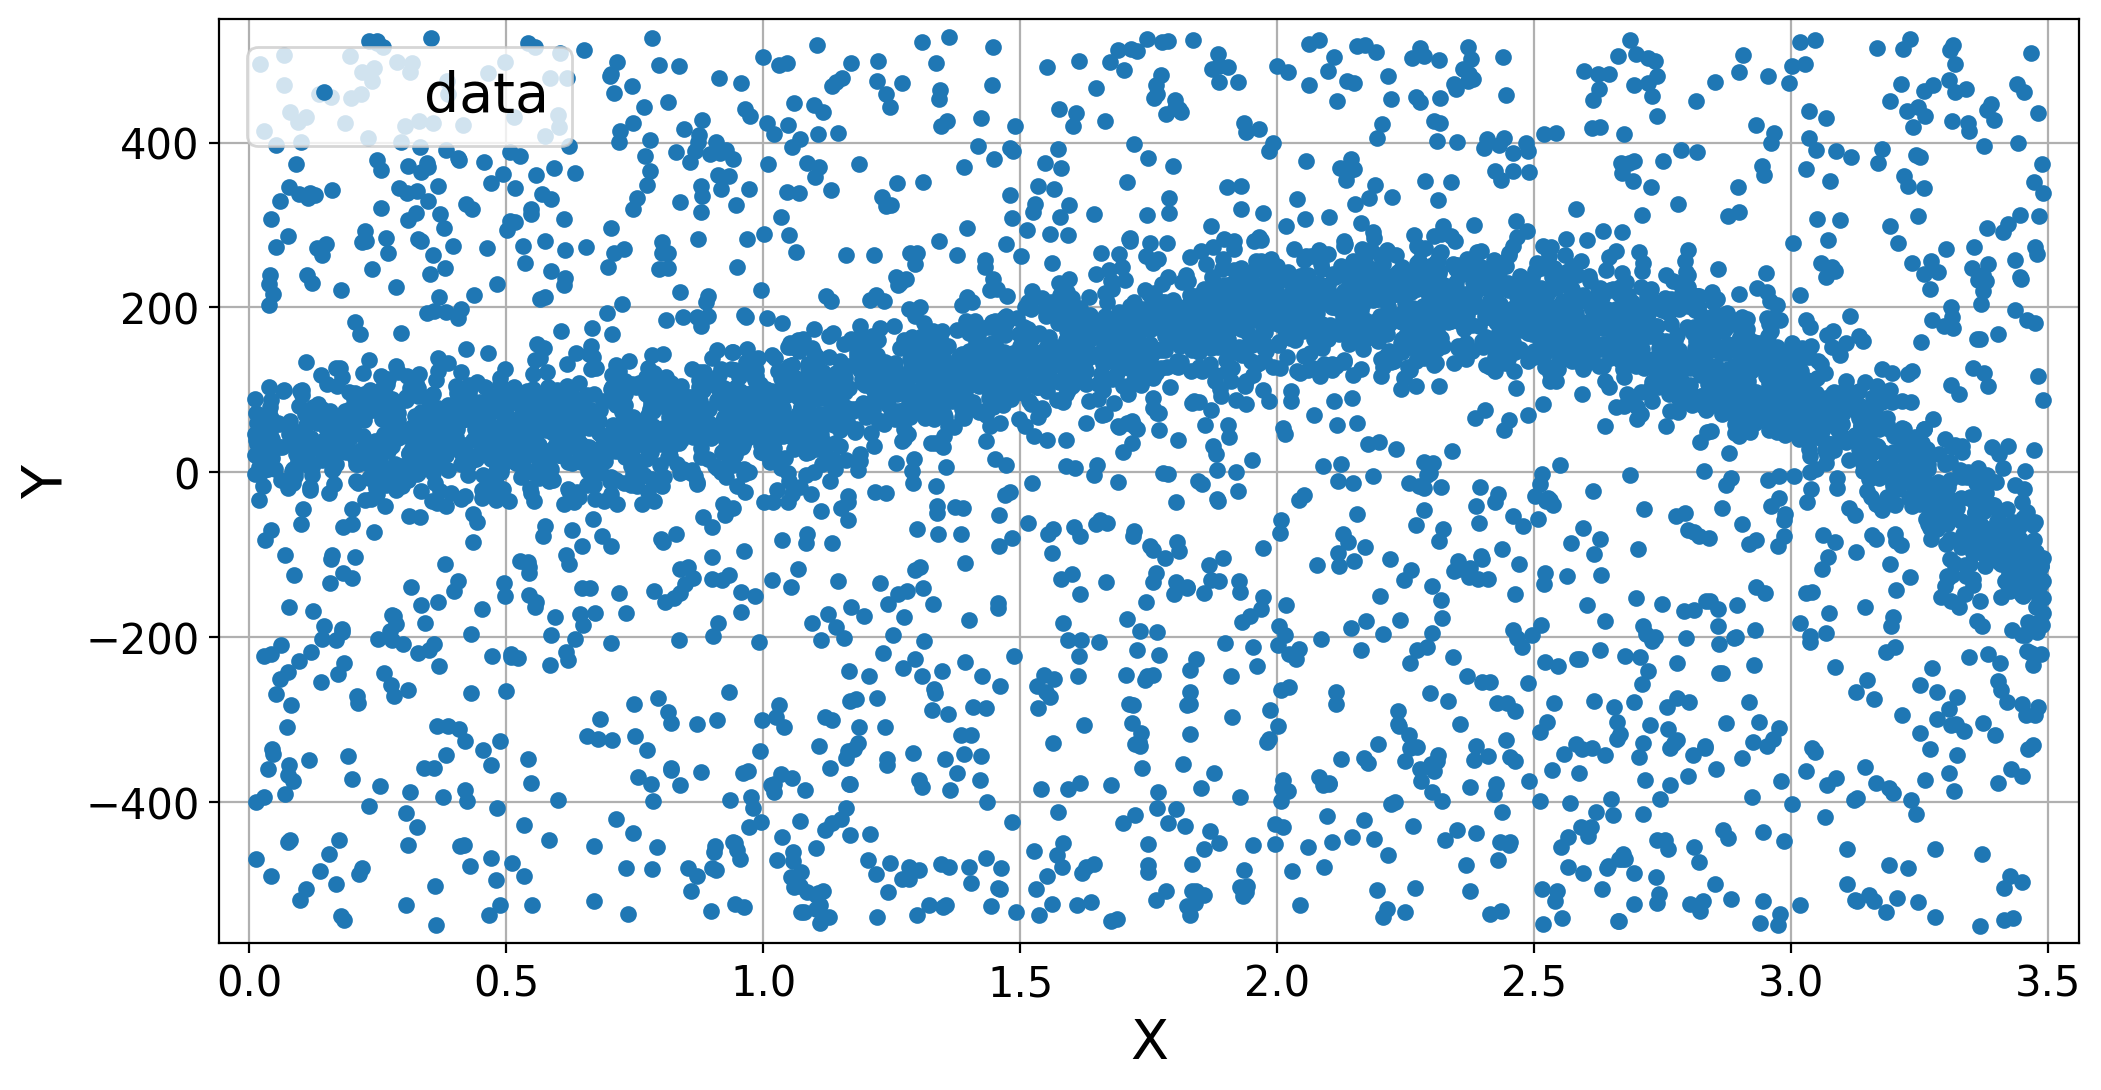

In [5]:
# Plotting the data
plot_res(data_x, data_y)

In [6]:
# Anpassung der Datensätze
data_x_reshaped = data_x.reshape(-1, 1)

### **1 a.) Standard Regression**
- Daten haben Rausch (Störgrößen)
- Entwickle Modell mit linear_model.LinearRegression()
- Erstelle hierzu eine Abbildung und gebe den gefundenen Zusammenhang an


In [7]:
reg = linear_model.LinearRegression()

In [8]:
reg.fit(X = data_x_reshaped, y = data_y)

LinearRegression()

In [9]:
reg.score(data_x_reshaped, data_y)

0.00013961776571513873

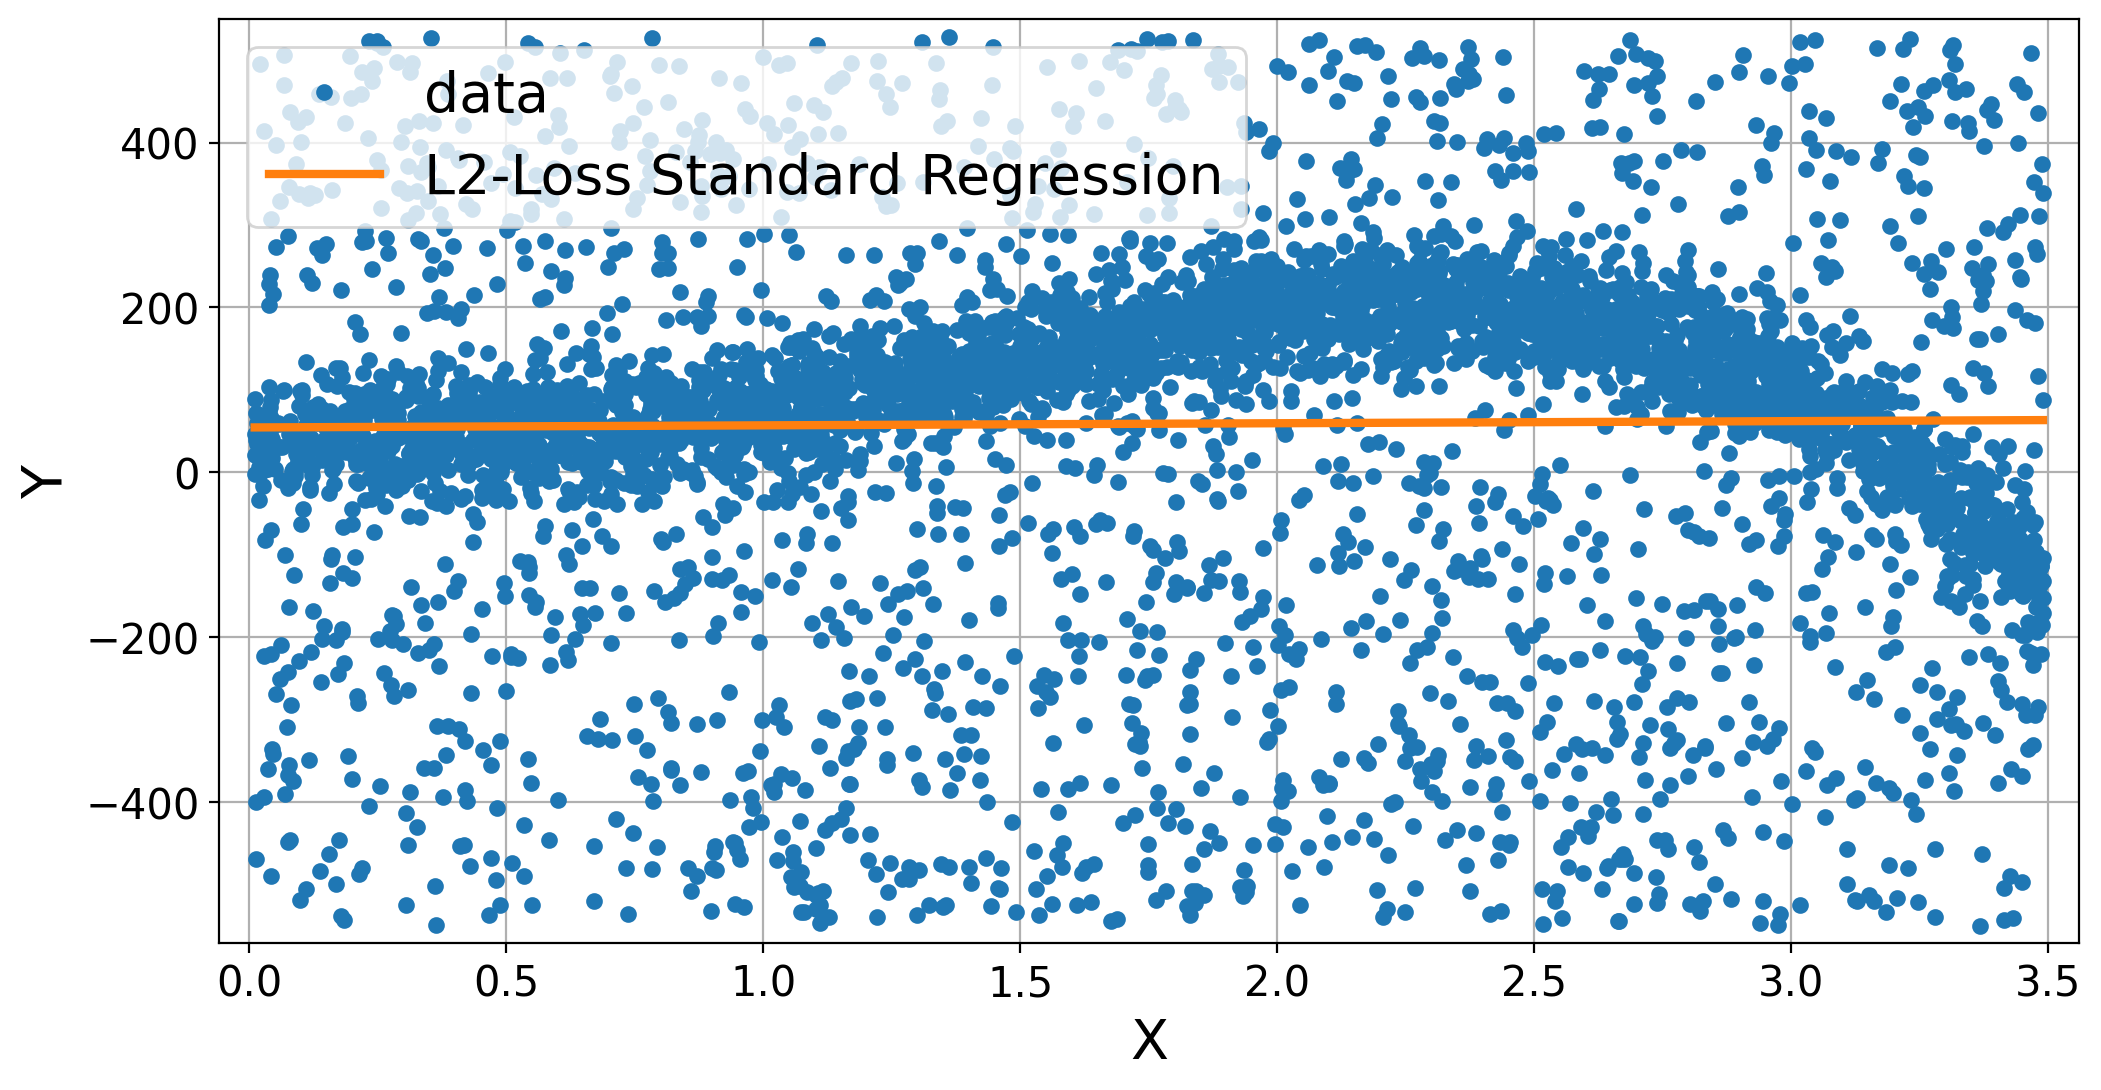

In [10]:
weights_LR = np.array([reg.intercept_, reg.coef_[0]])
plot_res(data_x=data_x, data_y=data_y, weights=weights_LR, labels = ["L2-Loss Standard Regression"])

### **1 b.) Huber Regression**
- Daten haben Rausch (Störgrößen)
- Entwickle Modell mit linear_model.HuberRegression()
- Erstelle hierzu eine Abbildung und gebe den gefundenen Zusammenhang an

In [11]:
reg_huber = linear_model.HuberRegressor()

In [12]:
reg_huber.fit(data_x_reshaped, data_y)

HuberRegressor()

In [13]:
reg_huber.score(data_x_reshaped, data_y)

-0.025404682988380722

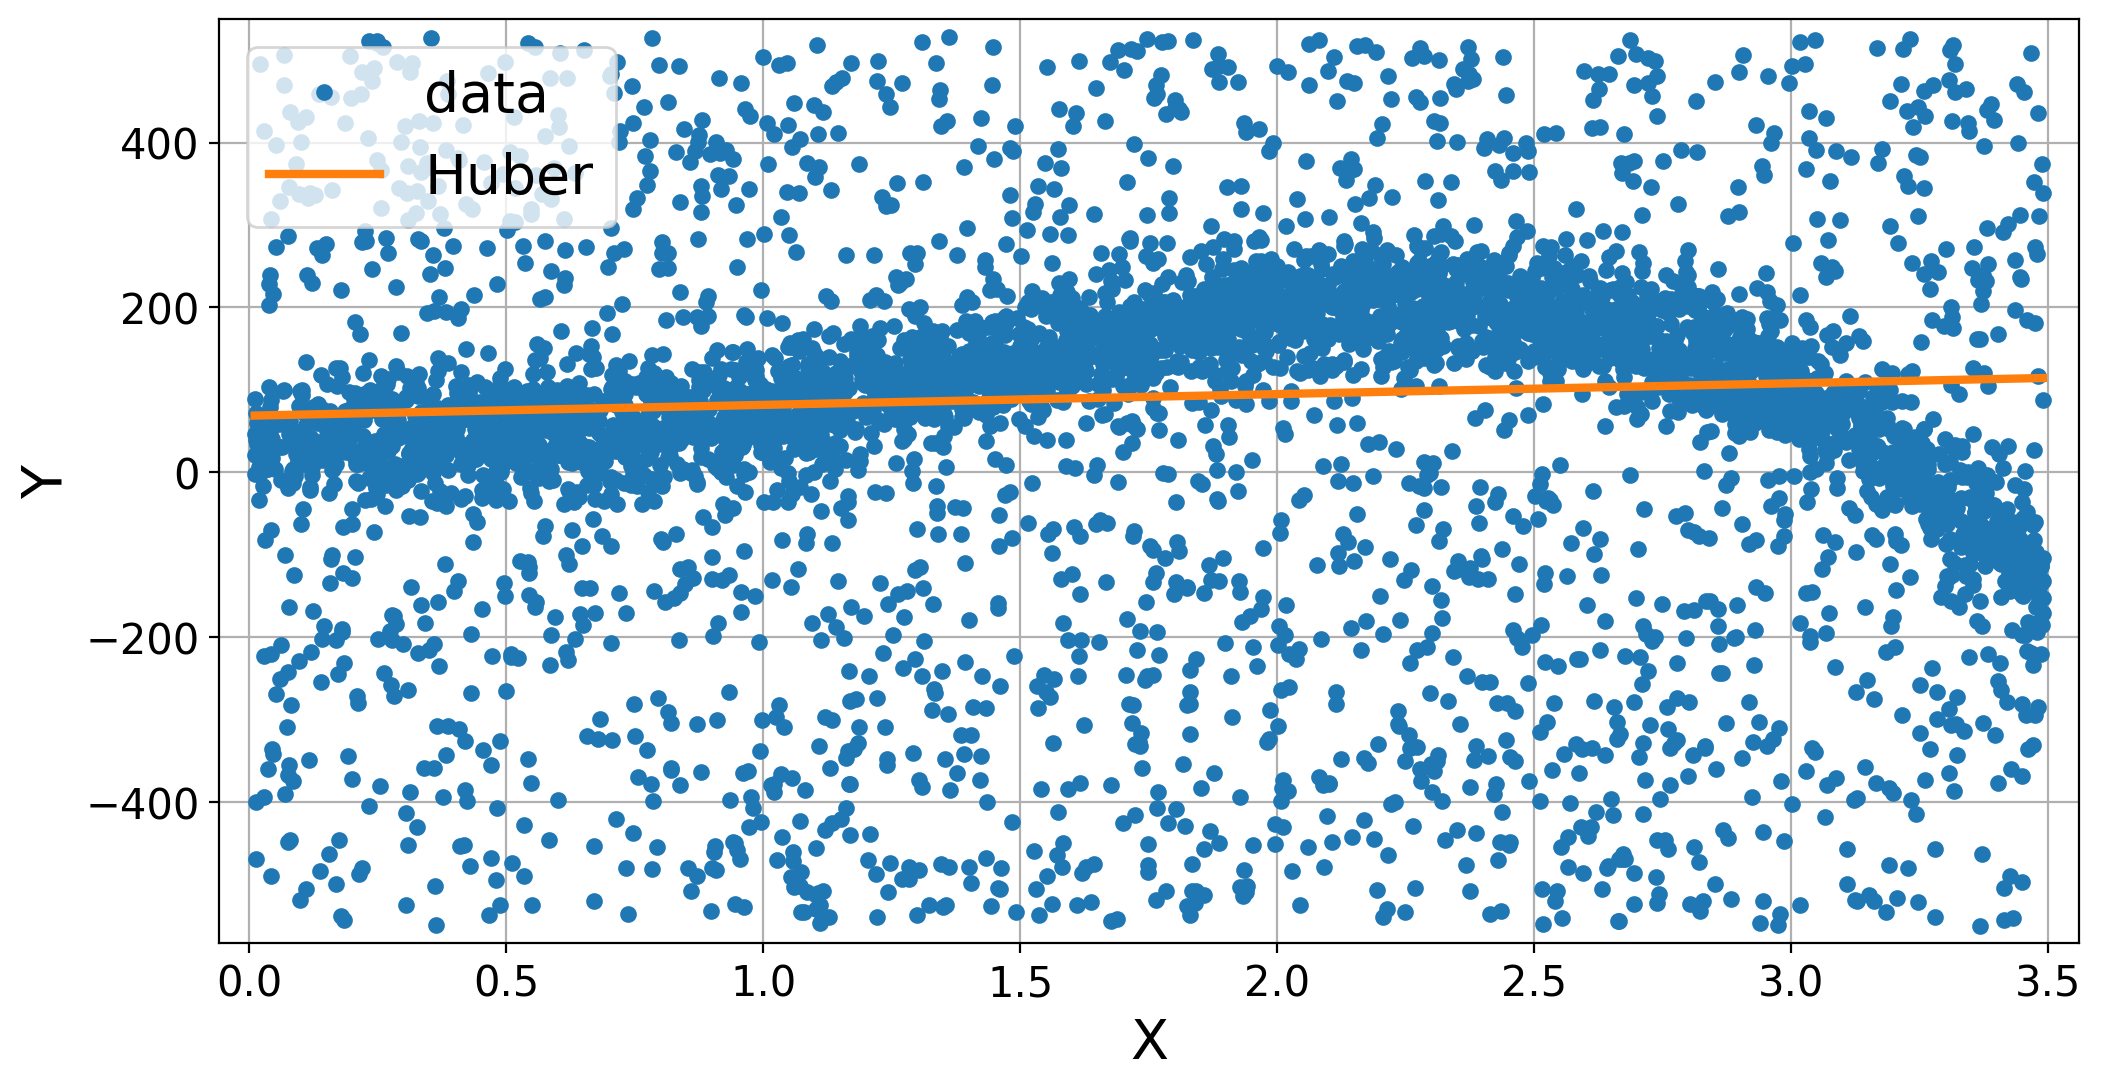

In [14]:
weights_huber = np.array([reg_huber.intercept_, reg_huber.coef_[0]])
plot_res(data_x=data_x, data_y=data_y, weights=weights_huber, labels = ["Huber"])

### **3. RANSAC Regression**
- Daten haben Rausch (Störgrößen)
- Bereinige die Daten mit dieser Methode
- Zeige den bereinigten Datensatz in einer Abbildung an

### Transformation der Daten in -x**2

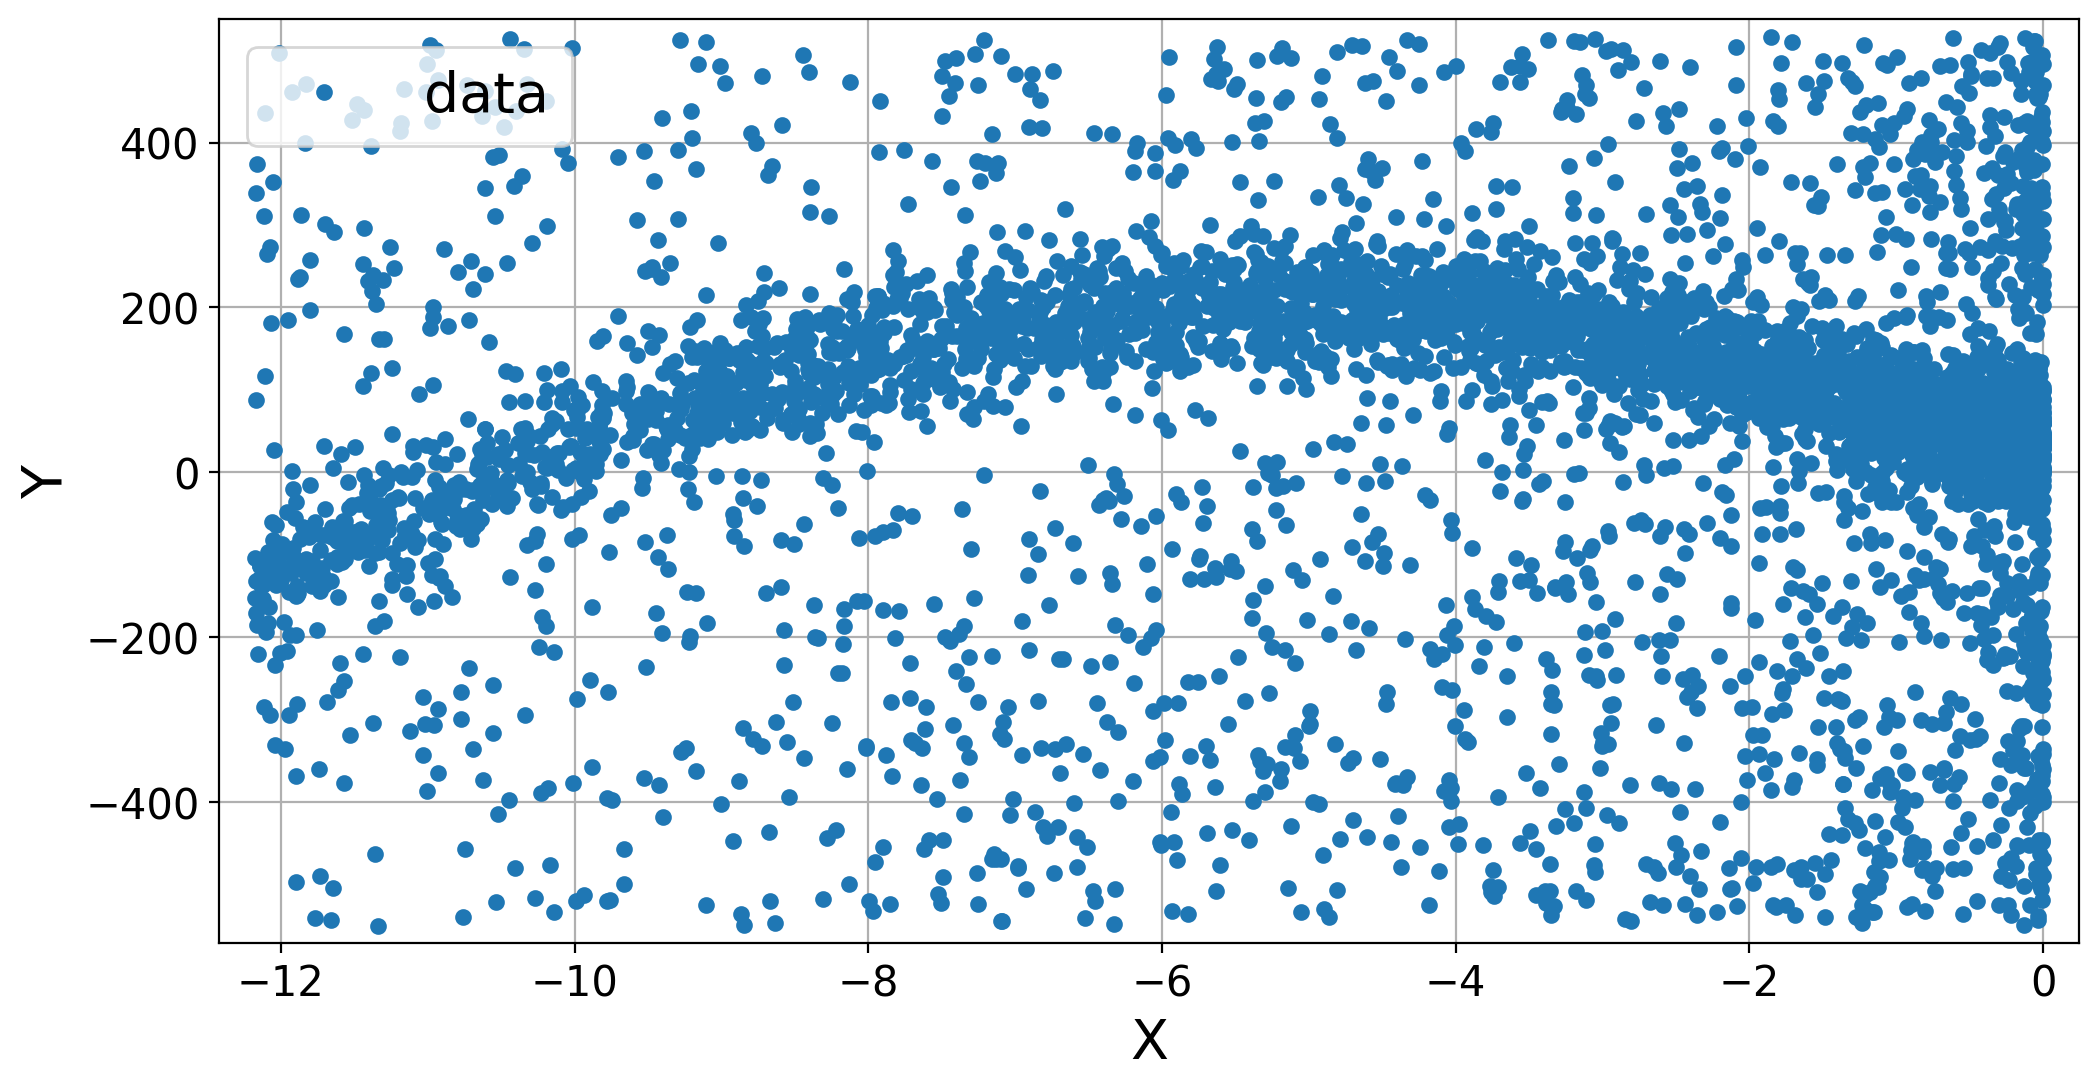

In [15]:
x_transform = -data_x**2
plot_res(x_transform, data_y)

In [16]:
reg_ransac = linear_model.RANSACRegressor(min_samples=5, residual_threshold=0.0000005)

In [17]:
reg_ransac.fit(X = data_x_reshaped, y = data_y)

ValueError: RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).

In [66]:
reg_ransac.score(data_x_reshaped, data_y)

AttributeError: 'RANSACRegressor' object has no attribute 'estimator_'

#### *Cleaning the Data with RANSAC*
- 1. Zeige die Daten an, die "Ausreißer" sind
- 2. Entferne die Ausreißer und erstelle ein weiteres Modell

In [67]:
weights_ransac = np.array([reg_ransac.estimator_.intercept_, 
                           reg_ransac.estimator_.coef_[0]])

# Ausreißer werden mit False ausgewertet
true_val = reg_ransac.inlier_mask_[reg_ransac.inlier_mask_ == True] # -Ausreißer
false_val = reg_ransac.inlier_mask_[reg_ransac.inlier_mask_ == False] # Ausreißer

print("Anzahl Daten ohne Ausreißer: ", len(true_val))
print("Anzahl Ausreißer: ", len(false_val))

inliers = reg_ransac.inlier_mask_
outliers = np.logical_not(inliers)

plot_res([data_x[inliers], data_x[outliers]],
         [data_y[inliers], data_y[outliers]],
        weights = [weights_LR, weights_huber, weights_ransac],
        is_data_list = True, is_list=True, 
        labels = ["Standard", "Huber", "Ransac"], 
        data_labels=['inliers', 'outliers'])


print(f"Score Standard: ", reg.score(data_x_reshaped, data_y), 
      "\nScore huber:  ", reg_huber.score(data_x_reshaped, data_y), 
      "\nScore RANSAC: ", reg_ransac.score(data_x_reshaped, data_y))

AttributeError: 'RANSACRegressor' object has no attribute 'estimator_'

### **Clean Data with RANSAC**

In [19]:
x_cleaned = data_x_reshaped[]


True Values:  2689
False Values:  2311


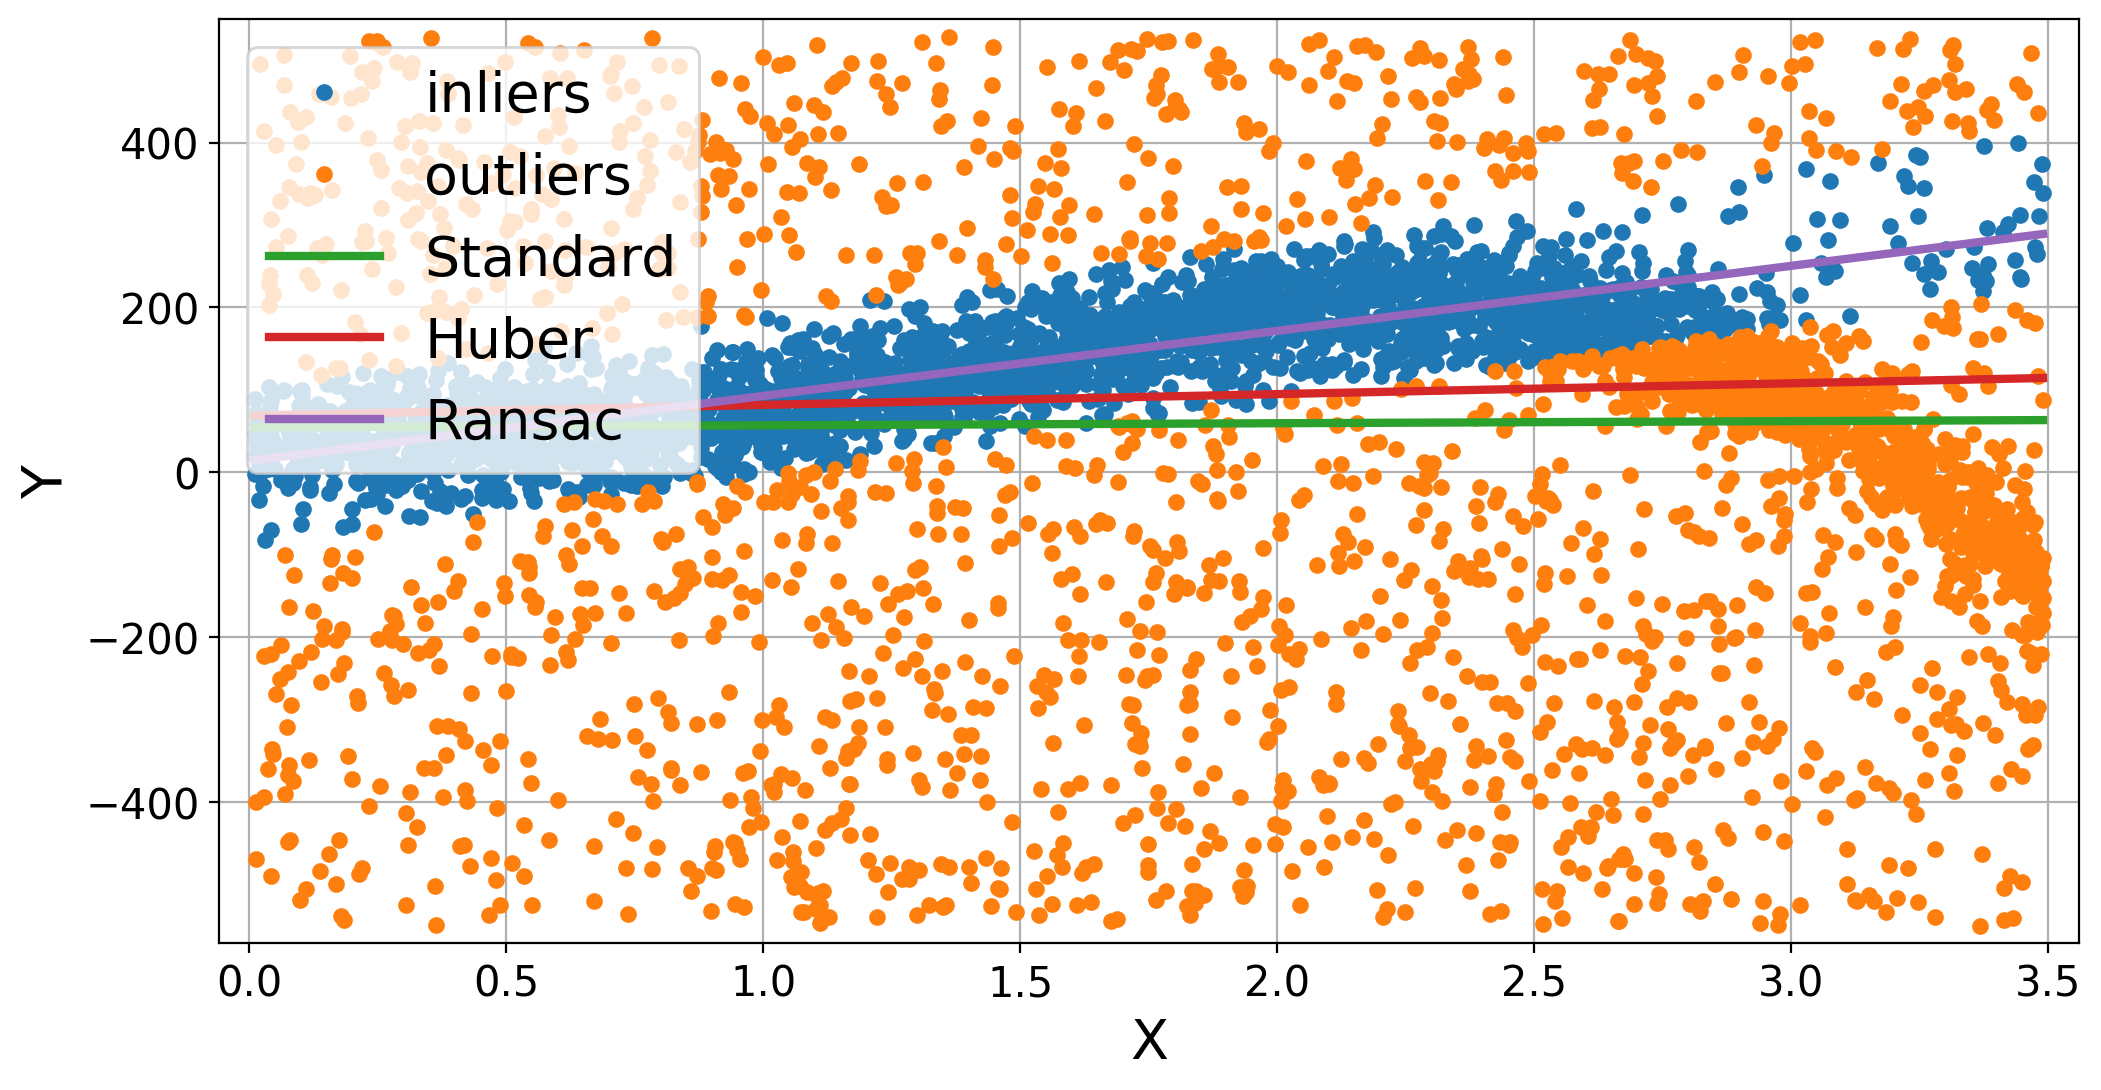

In [20]:
inliers = reg_ransac.inlier_mask_
outliers = np.logical_not(inliers)

plot_res([data_x[inliers], data_x[outliers]],
         [data_y[inliers], data_y[outliers]],
        weights = [weights_LR, weights_huber, weights_ransac],
        is_data_list = True, is_list=True, 
        labels = ["Standard", "Huber", "Ransac"], 
        data_labels=['inliers', 'outliers'])

### **4. Compare RANSAC Regression & Standard Regression**
- Daten haben Rausch (Störgrößen)
- Nutze die bereinigten Daten aus der RANSAC Methode und erstelle ein Modell für RANSAC und Standard
- Vergleiche beide Modelle miteinander
    - Vergleiche beide Modelle mit einer Abbildung, wo beide erkennbar sind


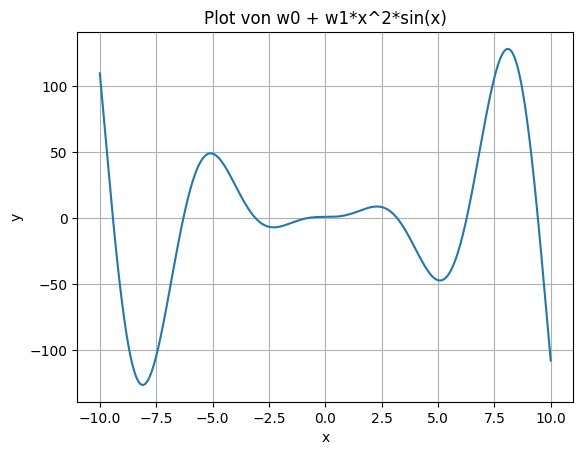

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(w0, w1):
    """
    Plottet die Funktion w0 + w1*x^2*sin(x).

    Args:
        w0: Konstante, verschiebt den Graphen vertikal.
        w1: Koeffizient, beeinflusst die Amplitude der Schwingungen.
    """

    x = np.linspace(-10, 10, 1000)  # Wertebereich für x
    y = w0 + w1 * x**2 * np.sin(x)

    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot von w0 + w1*x^2*sin(x)')
    plt.grid(True)
    plt.show()

# Beispielaufruf:
plot_function(1, 2)  # w0 = 1, w1 = 2

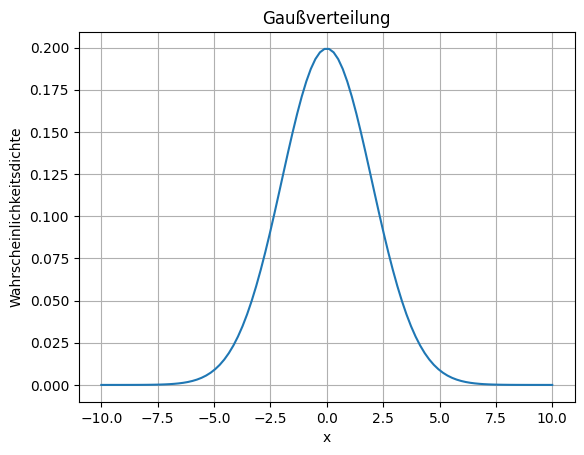

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def gauss(x, mu, sigma):
  """
  Berechnet die Wahrscheinlichkeitsdichte einer Gaußverteilung.

  Args:
    x: Werte, für die die Verteilung berechnet werden soll.
    mu: Mittelwert der Verteilung.
    sigma: Standardabweichung der Verteilung.

  Returns:
    Ein Array mit den entsprechenden Wahrscheinlichkeitsdichten.
  """

  return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Beispielaufruf:
mu = 0  # Mittelwert
sigma = 2  # Standardabweichung
x = np.linspace(-10, 10, 100)  # Wertebereich für x

plt.plot(x, gauss(x, mu, sigma))
plt.xlabel('x')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Gaußverteilung')
plt.grid(True)
plt.show()

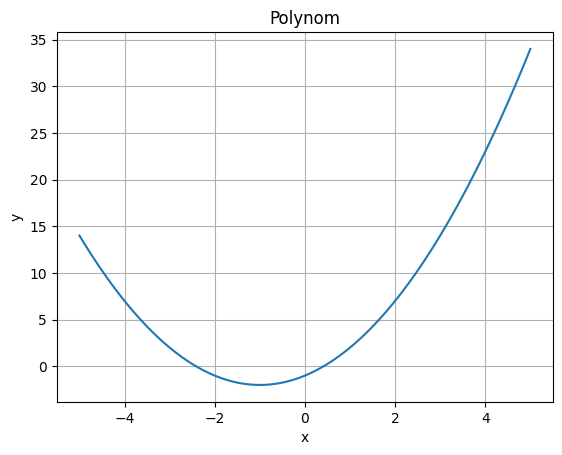

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polynomial(coefficients, x_min, x_max, num_points=100):
  """
  Plottet ein Polynom basierend auf gegebenen Koeffizienten.

  Args:
    coefficients: Eine Liste oder ein Array von Koeffizienten, beginnend mit dem konstanten Term.
    x_min: Minimaler x-Wert für den Plot.
    x_max: Maximaler x-Wert für den Plot.
    num_points: Anzahl der Punkte, die für den Plot berechnet werden.

  Returns:
    None (zeigt den Plot direkt an).
  """

  x = np.linspace(x_min, x_max, num_points)
  y = np.polyval(coefficients, x)

  plt.plot(x, y)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Polynom')
  plt.grid(True)
  plt.show()

# Beispielaufruf:
coefficients = [1, 2, -1]  # Polynom: 1 + 2x - x^2
plot_polynomial(coefficients, -5, 5)

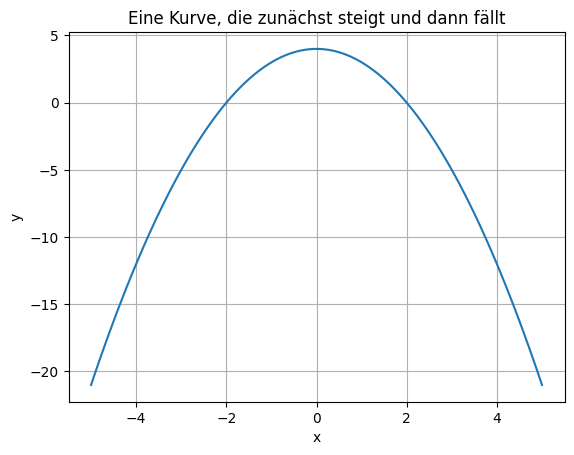

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_curve():
    # Definieren der x-Werte
    x = np.linspace(-5, 5, 100)

    # Definieren der quadratischen Funktion (z.B. -x^2 + 4)
    y = -x**2 + 4

    # Plotten der Kurve
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Eine Kurve, die zunächst steigt und dann fällt')
    plt.grid(True)
    plt.show()

plot_curve()